**TASK-10A: Please model the AD dataset using the SVM, Decision Tree, and Random Forest algorithms.
Please apply train test split (%75-%25)
Then grid search (hyperparameter tuning)
Then classification report and confusion matrix (on the test dataset)
Then compare the findings from the three algorithms.**

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd


In [2]:
data = pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


In [3]:
X = data.drop(['CDRGLOB'], axis = 1)
y=data.CDRGLOB

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [5]:
class_names = ['CDRGLOB 0','CDRGLOB 1','CDRGLOB 2','CDRGLOB 3']

**SVM**

In [6]:
param_grid_svc = {'C': [0.1,1,2,4],
              'kernel': ['rbf', 'poly'],
              'shrinking':[True,False]
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=10)
grid_svc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 4], 'kernel': ['rbf', 'poly'],
                         'shrinking': [True, False]})

In [7]:
grid_svc.best_params_

{'C': 4, 'kernel': 'poly', 'shrinking': True}

In [8]:
model_svc = grid_svc.best_estimator_
pred_svc = model_svc.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test, pred_svc))
print(" ")
print(classification_report(y_test, pred_svc,target_names=class_names))



[[139  23   0   0]
 [ 81  43   0   0]
 [ 13  28   0   0]
 [  2  10   0   0]]
 
              precision    recall  f1-score   support

   CDRGLOB 0       0.59      0.86      0.70       162
   CDRGLOB 1       0.41      0.35      0.38       124
   CDRGLOB 2       0.00      0.00      0.00        41
   CDRGLOB 3       0.00      0.00      0.00        12

    accuracy                           0.54       339
   macro avg       0.25      0.30      0.27       339
weighted avg       0.43      0.54      0.47       339



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree**

In [ ]:
param_grid_dc = {
    
    'min_samples_split': [1,2,4,8],
    'min_samples_leaf': [1,4, 7, 10],
    'max_features' : [1,2,4,8]
      }

grid_dc = GridSearchCV(DecisionTreeClassifier(), param_grid_dc, cv=10)
grid_dc.fit(X_train,y_train)


In [10]:
grid_dc.best_params_

{'max_features': 8, 'min_samples_leaf': 7, 'min_samples_split': 8}

In [11]:
model_dc = grid_dc.best_estimator_
pred_dc = model_dc.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test, pred_dc))
print(" ")
print(classification_report(y_test, pred_dc,target_names=class_names))


[[117  43   2   0]
 [ 55  55  12   2]
 [ 12  19   8   2]
 [  2   5   3   2]]
 
              precision    recall  f1-score   support

   CDRGLOB 0       0.63      0.72      0.67       162
   CDRGLOB 1       0.45      0.44      0.45       124
   CDRGLOB 2       0.32      0.20      0.24        41
   CDRGLOB 3       0.33      0.17      0.22        12

    accuracy                           0.54       339
   macro avg       0.43      0.38      0.40       339
weighted avg       0.52      0.54      0.52       339



**Random Forest**

In [12]:
param_grid_rf = {
    'n_estimators' : [10,50,100],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [2,4,6]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf,cv=10)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]})

In [13]:
grid_rf.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}

In [14]:
model_rf = grid_rf.best_estimator_
pred_rf = model_rf.fit(X_train,y_train).predict(X_test)
print(confusion_matrix(y_test, pred_rf))
print(" ")
print(classification_report(y_test, pred_rf,target_names=class_names))


[[133  29   0   0]
 [ 42  80   2   0]
 [  0  28  13   0]
 [  0   3   7   2]]
 
              precision    recall  f1-score   support

   CDRGLOB 0       0.76      0.82      0.79       162
   CDRGLOB 1       0.57      0.65      0.61       124
   CDRGLOB 2       0.59      0.32      0.41        41
   CDRGLOB 3       1.00      0.17      0.29        12

    accuracy                           0.67       339
   macro avg       0.73      0.49      0.52       339
weighted avg       0.68      0.67      0.66       339



0.5368731563421829
0.5368731563421829
0.672566371681416


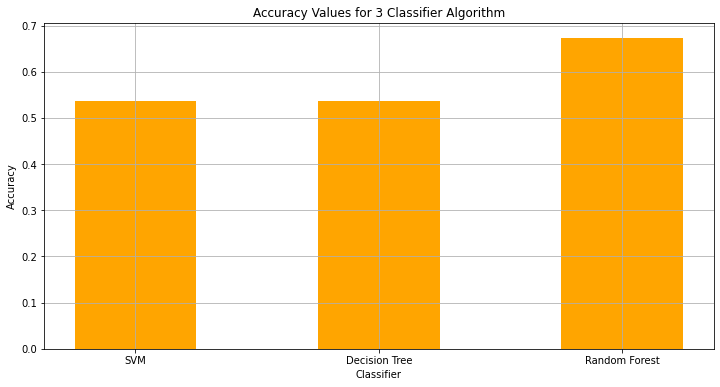

In [15]:
import matplotlib.pyplot as plt
acc_svc = accuracy_score(y_test, pred_svc)
print(acc_svc)
acc_dc = accuracy_score(y_test,pred_dc)
print(acc_dc)
acc_rf = accuracy_score(y_test,pred_rf)
print(acc_rf)
classifier_name = ["SVM","Decision Tree","Random Forest"]
accuracy_scores = [acc_svc, acc_dc, acc_rf]
fig = plt.figure(figsize = (12, 6))
plt.bar(classifier_name, accuracy_scores, color ='orange', width = 0.5) 
plt.title("Accuracy Values ​​for 3 Classifier Algorithm")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.grid()
plt.show()